In [72]:
import pandas as pd
from imret.query import Annotation

In [73]:
df = pd.read_csv('../data/preposition/index-color2.csv')
annot = Annotation('../data/query/test_anno/')

In [135]:
set(df[(df.object1 == 'building') & (df.object2 == 'wall')].preposition)

{'above', 'behind', 'below', 'in', 'in front of', 'left of', 'on', 'under'}

In [136]:
query = annot.db.keys()[5]
print(query)
obj1, prep, obj2 = query.split('-')
valid = df[(df.object1 == obj1) & (df.object2 == obj2) & (df.preposition == prep.replace('_', ' '))][['image', 'score']]
retrieved, relevance = valid['image'].values, valid['score'].values
print len(retrieved)

building-behind-wall
352


In [137]:
print(len(set(retrieved) & set(annot.db[query])))
print(len(annot.db[query]))

26
84


In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2

a_alleyway_alley_000016.jpg False
building 95923
wall 14952


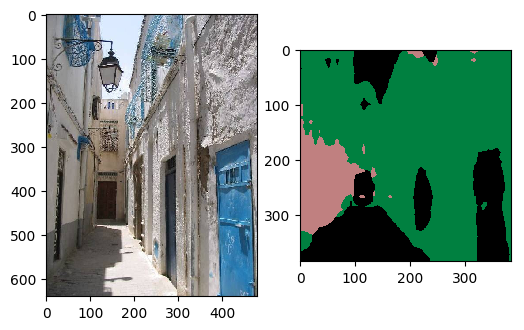

In [148]:
index = 7
print retrieved[index], retrieved[index] in annot.db[query]
imname = os.path.join('../data/images/', retrieved[index])
label = os.path.join('../data/segmented/', retrieved[index].replace('.jpg', '.png'))
image = cv2.imread(imname)
segmented = cv2.imread(label, 0)
plt.subplot(121)
plt.imshow(image[:, :, (2, 1, 0)])
plt.subplot(122)
plt.imshow(to_color(segmented)[:, :, (2, 1, 0)])

In [44]:
from imret.color import ColorPalette

In [45]:
color_palette = ColorPalette('../data/query/name_conversion.csv')

In [140]:
def to_color(image):
    w, h = image.shape
    paletted = np.zeros((w, h, 3), dtype=np.uint8)
    for pixel_value in np.unique(image):
        name = color_palette.get_name(pixel_value)
        if name in [obj1, obj2]:
            x, y = np.where(image == pixel_value)
            print("{} {}".format(name, len(x)))
            r, g, b = color_palette.color_from_id(class_id=pixel_value)
            paletted[x, y, :] = np.array([r, g, b])
    return paletted